In [2]:
import os
import re
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [8]:
# mobility_csvs = glob.glob('Region_Mobility_Report_CSVs/*')
# set([x.split('/')[-1].split('_')[0] for x in mobility_csvs]) # 2020, 2021, 2022
mobility_csvs = [
    'Region_Mobility_Report_CSVs/2020_US_Region_Mobility_Report.csv',
    'Region_Mobility_Report_CSVs/2021_US_Region_Mobility_Report.csv',
    'Region_Mobility_Report_CSVs/2022_US_Region_Mobility_Report.csv'
]

In [12]:
dfs = [pd.read_csv(csv) for csv in mobility_csvs]
dfs = dict(zip([2020,2021,2022], dfs))

In [13]:
dfs

{2020:        country_region_code country_region sub_region_1   sub_region_2  \
 0                       US  United States          NaN            NaN   
 1                       US  United States          NaN            NaN   
 2                       US  United States          NaN            NaN   
 3                       US  United States          NaN            NaN   
 4                       US  United States          NaN            NaN   
 ...                    ...            ...          ...            ...   
 812060                  US  United States      Wyoming  Weston County   
 812061                  US  United States      Wyoming  Weston County   
 812062                  US  United States      Wyoming  Weston County   
 812063                  US  United States      Wyoming  Weston County   
 812064                  US  United States      Wyoming  Weston County   
 
         metro_area iso_3166_2_code  census_fips_code  \
 0              NaN             NaN            

In [11]:
pd.concat(dfs)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747964,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-10-10,NaN,NaN,NaN,NaN,-26.0,NaN
747965,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-10-11,NaN,NaN,NaN,NaN,-20.0,NaN
747966,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-10-12,NaN,NaN,NaN,NaN,-17.0,NaN
747967,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-10-13,NaN,NaN,NaN,NaN,-15.0,NaN


In [20]:
df.date = df.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [21]:
df.date.min(), df.date.max()

(Timestamp('2020-02-15 00:00:00'), Timestamp('2020-12-31 00:00:00'))

In [37]:
place_ids = df.place_id.unique()
regions = df.loc[df.place_id.isin(place_ids), ['sub_region_1', 'sub_region_2']].drop_duplicates()

In [46]:
state, county = regions.iloc[2].sub_region_1, regions.iloc[2].sub_region_2

In [48]:
region_df = df.loc[(df.sub_region_1 == state) & (df.sub_region_2 == county)]

In [70]:
p = re.compile('_baseline')
mobility_columns = list(filter(lambda x: p.search(x) is not None, df.columns))

In [72]:
region_date_df = region_df[['date']]
region_mobility_df = region_df[mobility_columns]

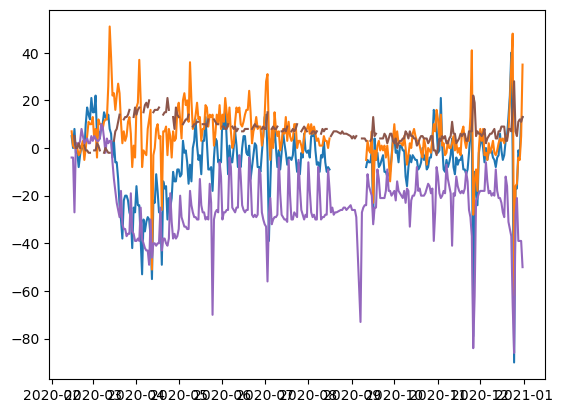

In [79]:
plt.plot(region_date_df, region_mobility_df)
plt.show()